# HK Model in 3D

## 1. Setup

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

t = 1
d = 3

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result

def I_3(x):
    I_1_shifted = lambda k1, k2: I_1(x + 2 * t * (np.cos(k1) + np.cos(k2)))

    integral_val = integrate.dblquad(I_1_shifted, -np.pi, np.pi, -np.pi, np.pi)

    return_val = integral_val[0] / ((2 * np.pi)**2)

    return return_val

def rho_3d(mu, U):
    if U >= 0:
        return I_3(mu) + I_3(mu - U)
    elif U < 0:
        return 2 * I_3(mu - U/2)
    
def one_plot(x_array, y_array,x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show() 

def create_mu_and_rho_arrays(U, N):
    mu_array = np.linspace(-2*t*d, 2*t*d + U, N)
    rho_list = []

    i = 1

    for mu_i in mu_array:
        print(f'\rProgress: {(i / N * 100):.1f}%{' ' * 20}', end="", flush=True)
        i += 1
        rho_i = rho_3d(mu_i, U)
        rho_list.append(rho_i)

    rho_array = np.array(rho_list)

    return mu_array, rho_array

## 2. Chemical Potential

### Calculation

In [9]:
print('U = 8:')
mu_U8, rho_U8 = create_mu_and_rho_arrays(8, 100)
print('U = 12:')
mu_U12, rho_U12 = create_mu_and_rho_arrays(12, 100)
print('U = 20:')
mu_U20, rho_U20 = create_mu_and_rho_arrays(20, 100)

Progress: 27.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 35.0%                     

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 100.0%                    

### Plots

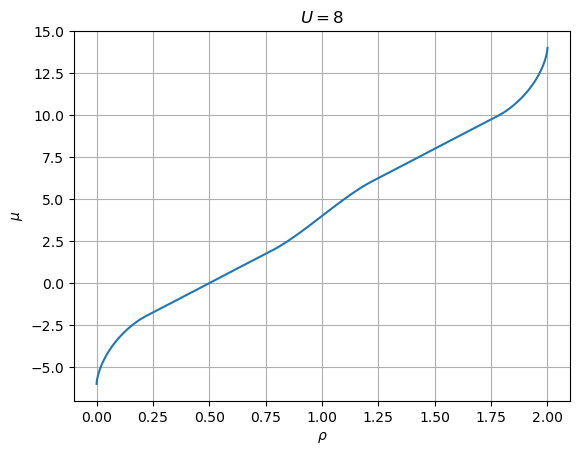

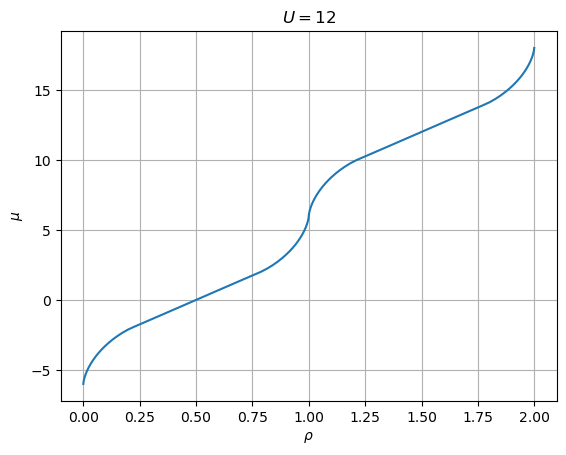

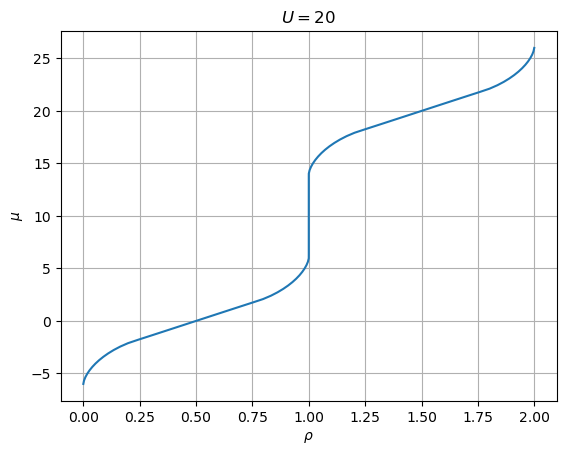

In [10]:
one_plot(rho_U8, mu_U8, r'$\rho$', r'$\mu$', r'$U=8$')
one_plot(rho_U12, mu_U12, r'$\rho$', r'$\mu$', r'$U=12$')
one_plot(rho_U20, mu_U20, r'$\rho$', r'$\mu$', r'$U=20$')

### Saving Progress

In [13]:
print('[')
for i in range(100):
    print(f'{mu_U8[i]},')
print(']')
print('[')
for i in range(100):
    print(f'{rho_U8[i]},')
print(']')

[
-6.0,
-5.797979797979798,
-5.595959595959596,
-5.393939393939394,
-5.191919191919192,
-4.98989898989899,
-4.787878787878788,
-4.585858585858586,
-4.383838383838384,
-4.181818181818182,
-3.9797979797979797,
-3.7777777777777777,
-3.5757575757575757,
-3.3737373737373737,
-3.1717171717171717,
-2.9696969696969697,
-2.7676767676767677,
-2.5656565656565657,
-2.3636363636363638,
-2.1616161616161618,
-1.9595959595959593,
-1.7575757575757578,
-1.5555555555555554,
-1.3535353535353538,
-1.1515151515151514,
-0.9494949494949498,
-0.7474747474747474,
-0.5454545454545459,
-0.3434343434343434,
-0.14141414141414188,
0.06060606060606055,
0.2626262626262621,
0.46464646464646453,
0.666666666666667,
0.8686868686868685,
1.070707070707071,
1.2727272727272725,
1.474747474747475,
1.6767676767676765,
1.878787878787879,
2.0808080808080813,
2.282828282828282,
2.4848484848484844,
2.686868686868687,
2.8888888888888893,
3.09090909090909,
3.2929292929292924,
3.494949494949495,
3.6969696969696972,
3.8989898989898997,

In [ ]:
mu_U8_copy = [
-6.0,
-5.797979797979798,
-5.595959595959596,
-5.393939393939394,
-5.191919191919192,
-4.98989898989899,
-4.787878787878788,
-4.585858585858586,
-4.383838383838384,
-4.181818181818182,
-3.9797979797979797,
-3.7777777777777777,
-3.5757575757575757,
-3.3737373737373737,
-3.1717171717171717,
-2.9696969696969697,
-2.7676767676767677,
-2.5656565656565657,
-2.3636363636363638,
-2.1616161616161618,
-1.9595959595959593,
-1.7575757575757578,
-1.5555555555555554,
-1.3535353535353538,
-1.1515151515151514,
-0.9494949494949498,
-0.7474747474747474,
-0.5454545454545459,
-0.3434343434343434,
-0.14141414141414188,
0.06060606060606055,
0.2626262626262621,
0.46464646464646453,
0.666666666666667,
0.8686868686868685,
1.070707070707071,
1.2727272727272725,
1.474747474747475,
1.6767676767676765,
1.878787878787879,
2.0808080808080813,
2.282828282828282,
2.4848484848484844,
2.686868686868687,
2.8888888888888893,
3.09090909090909,
3.2929292929292924,
3.494949494949495,
3.6969696969696972,
3.8989898989898997,
4.1010101010101,
4.303030303030303,
4.505050505050505,
4.707070707070708,
4.909090909090908,
5.111111111111111,
5.313131313131313,
5.515151515151516,
5.717171717171716,
5.919191919191919,
6.121212121212121,
6.3232323232323235,
6.525252525252524,
6.727272727272727,
6.929292929292929,
7.1313131313131315,
7.333333333333334,
7.535353535353535,
7.737373737373737,
7.9393939393939394,
8.141414141414142,
8.343434343434343,
8.545454545454545,
8.747474747474747,
8.94949494949495,
9.15151515151515,
9.353535353535353,
9.555555555555555,
9.757575757575758,
9.959595959595958,
10.161616161616163,
10.363636363636363,
10.565656565656564,
10.767676767676768,
10.969696969696969,
11.171717171717173,
11.373737373737374,
11.575757575757574,
11.777777777777779,
11.97979797979798,
12.18181818181818,
12.383838383838384,
12.585858585858585,
12.787878787878789,
12.98989898989899,
13.19191919191919,
13.393939393939394,
13.595959595959595,
13.7979797979798,
14.0,
]

rho_U8_copy = [
0.0,
0.0015570544229562948,
0.004473870049336626,
0.008352920730959041,
0.013075586815166176,
0.018588839942749267,
0.024870147626825292,
0.03191538714213863,
0.039733720770794186,
0.04834537167259778,
0.057780937958666866,
0.0680817586986117,
0.07930123232739206,
0.0915072541453272,
0.10478625443434811,
0.11924987322561281,
0.1350465487686048,
0.1523835784252274,
0.1715762045835003,
0.19319377929597897,
0.21917426774300522,
0.24834861013848292,
0.27744829688779543,
0.3064830102965476,
0.33546200182350516,
0.364394167225549,
0.39328811316792334,
0.4221522172540731,
0.4509946777066025,
0.4798235709921853,
0.5086468838331611,
0.5374725859935886,
0.56630865597747,
0.5951631263836054,
0.6240441422189531,
0.6529600010295984,
0.6819192119650221,
0.710930550755615,
0.7400031121831757,
0.769146397105489,
0.7975992481357692,
0.8227115971237783,
0.8461043070059171,
0.868362532036331,
0.8897891587703267,
0.9105875379750566,
0.9309118192754556,
0.950888162953158,
0.9706258348914741,
0.9902239279917913,
1.0097760720813893,
1.0293741655088635,
1.049111835389355,
1.0690881802599592,
1.0894124624269574,
1.1102108414100411,
1.1316374686936053,
1.1538956925111998,
1.1772884104860903,
1.202400753347081,
1.230853602752023,
1.2599968886927293,
1.2890694450001243,
1.3180807880748384,
1.3470399989573023,
1.3759558576870918,
1.4048368737686197,
1.4336913441197128,
1.4625274135536832,
1.4913531160435647,
1.5201764290693967,
1.5490053222679483,
1.5778477827449369,
1.6067118865896386,
1.63560583250583,
1.6645379980634956,
1.693516989663181,
1.7225517015850107,
1.7516513875189808,
1.780825730538564,
1.8068062209323394,
1.828423795105843,
1.8476164251670137,
1.8649534509257937,
1.8807501264004962,
1.8952137462393959,
1.9084927455610448,
1.9206987679155016,
1.9319182414892628,
1.9422190618346618,
1.9516546303591455,
1.9602662788586895,
1.9680846142584496,
1.9751298526882968,
1.98141116020127,
1.9869244162617556,
1.9916470791213428,
1.9955261302685425,
1.9984429459921051,
2.0,
]


In [14]:
print('[')
for i in range(100):
    print(f'{mu_U12[i]},')
print(']')
print('[')
for i in range(100):
    print(f'{rho_U12[i]},')
print(']')

[
-6.0,
-5.757575757575758,
-5.515151515151516,
-5.2727272727272725,
-5.03030303030303,
-4.787878787878788,
-4.545454545454545,
-4.303030303030303,
-4.0606060606060606,
-3.8181818181818183,
-3.5757575757575757,
-3.333333333333333,
-3.090909090909091,
-2.8484848484848486,
-2.606060606060606,
-2.3636363636363633,
-2.121212121212121,
-1.878787878787879,
-1.6363636363636367,
-1.3939393939393936,
-1.1515151515151514,
-0.9090909090909092,
-0.6666666666666661,
-0.42424242424242387,
-0.18181818181818166,
0.06060606060606055,
0.30303030303030276,
0.5454545454545459,
0.7878787878787881,
1.0303030303030303,
1.2727272727272734,
1.5151515151515156,
1.7575757575757578,
2.0,
2.242424242424242,
2.4848484848484844,
2.7272727272727266,
2.9696969696969706,
3.212121212121213,
3.454545454545455,
3.6969696969696972,
3.9393939393939394,
4.181818181818182,
4.424242424242424,
4.666666666666668,
4.90909090909091,
5.151515151515152,
5.3939393939393945,
5.636363636363637,
5.878787878787879,
6.121212121212121,
6.3

In [ ]:
mu_U12_copy =[
-6.0,
-5.757575757575758,
-5.515151515151516,
-5.2727272727272725,
-5.03030303030303,
-4.787878787878788,
-4.545454545454545,
-4.303030303030303,
-4.0606060606060606,
-3.8181818181818183,
-3.5757575757575757,
-3.333333333333333,
-3.090909090909091,
-2.8484848484848486,
-2.606060606060606,
-2.3636363636363633,
-2.121212121212121,
-1.878787878787879,
-1.6363636363636367,
-1.3939393939393936,
-1.1515151515151514,
-0.9090909090909092,
-0.6666666666666661,
-0.42424242424242387,
-0.18181818181818166,
0.06060606060606055,
0.30303030303030276,
0.5454545454545459,
0.7878787878787881,
1.0303030303030303,
1.2727272727272734,
1.5151515151515156,
1.7575757575757578,
2.0,
2.242424242424242,
2.4848484848484844,
2.7272727272727266,
2.9696969696969706,
3.212121212121213,
3.454545454545455,
3.6969696969696972,
3.9393939393939394,
4.181818181818182,
4.424242424242424,
4.666666666666668,
4.90909090909091,
5.151515151515152,
5.3939393939393945,
5.636363636363637,
5.878787878787879,
6.121212121212121,
6.363636363636363,
6.6060606060606055,
6.8484848484848495,
7.090909090909092,
7.333333333333334,
7.575757575757576,
7.818181818181818,
8.06060606060606,
8.303030303030303,
8.545454545454547,
8.787878787878789,
9.030303030303031,
9.272727272727273,
9.515151515151516,
9.757575757575758,
10.0,
10.242424242424242,
10.484848484848484,
10.727272727272727,
10.969696969696969,
11.212121212121211,
11.454545454545453,
11.696969696969699,
11.939393939393941,
12.181818181818183,
12.424242424242426,
12.666666666666668,
12.90909090909091,
13.151515151515152,
13.393939393939394,
13.636363636363637,
13.878787878787879,
14.121212121212121,
14.363636363636363,
14.606060606060606,
14.848484848484848,
15.09090909090909,
15.333333333333336,
15.575757575757578,
15.81818181818182,
16.060606060606062,
16.303030303030305,
16.545454545454547,
16.78787878787879,
17.03030303030303,
17.272727272727273,
17.515151515151516,
17.757575757575758,
18.0,
]
rho_U12_copy = [
0.0,
0.0020531869040934813,
0.005918883070803362,
0.011089566222673809,
0.017424335882057822,
0.024870147626825292,
0.03341671058489438,
0.04308170149292925,
0.05390544725513094,
0.0659500005572166,
0.07930123232739206,
0.09407406099679538,
0.1104222282864511,
0.12855634011981434,
0.14878002772267387,
0.1715762045835004,
0.19790581925524622,
0.23085360275202302,
0.26581675093044865,
0.3006808158685045,
0.33546200182350516,
0.37017574294603317,
0.4048368737686196,
0.43945977136878517,
0.47405848458110456,
0.5086468838331611,
0.5432387167470546,
0.5778477827449369,
0.6124880214970494,
0.6471736366315164,
0.6819192119650225,
0.7167398645852647,
0.7516513875189806,
0.7866704601667197,
0.8158025214083442,
0.8401854239351138,
0.8616173393339256,
0.8807501264004967,
0.8979603063866067,
0.9134986017186006,
0.9275441333985449,
0.940229641389436,
0.9516546303591455,
0.961892613589029,
0.9709947040900223,
0.9789902341405063,
0.9858839579689794,
0.9916470791213429,
0.9961922714652311,
0.9992808072095728,
1.000719193257779,
1.00380772815033,
1.008352920730959,
1.014116041833376,
1.0210097657950503,
1.0290052958722793,
1.038107386307764,
1.048345371672598,
1.0597703584207152,
1.0724558667521535,
1.0865014051097814,
1.102039693687887,
1.1192498732256129,
1.13838266011851,
1.1598145756727316,
1.1841974779648363,
1.213329549406518,
1.2483486101384829,
1.2832601353482054,
1.3180807880748384,
1.3528263633653097,
1.3875119782699423,
1.422152217254073,
1.4567612843447906,
1.4913531160435651,
1.5259415153634737,
1.5605402284028753,
1.595163126383606,
1.6298242569095898,
1.6645379980634956,
1.699319182776018,
1.7341832492649747,
1.769146397105489,
1.8020941807440432,
1.828423795105843,
1.8512199723021032,
1.8714436588227348,
1.8895777721800064,
1.905925939417953,
1.9206987679155019,
1.9340499965123277,
1.9460945520733397,
1.95691829875671,
1.9665832894583928,
1.9751298526882968,
1.9825756640197718,
1.9889104357682397,
1.9940811168384682,
1.997946812179637,
2.0,
]


In [15]:
print('[')
for i in range(100):
    print(f'{mu_U20[i]},')
print(']')
print('[')
for i in range(100):
    print(f'{rho_U20[i]},')
print(']')

[
-6.0,
-5.6767676767676765,
-5.353535353535354,
-5.03030303030303,
-4.707070707070707,
-4.383838383838384,
-4.0606060606060606,
-3.737373737373737,
-3.414141414141414,
-3.090909090909091,
-2.7676767676767673,
-2.444444444444444,
-2.121212121212121,
-1.7979797979797976,
-1.474747474747474,
-1.1515151515151514,
-0.8282828282828278,
-0.5050505050505043,
-0.18181818181818166,
0.14141414141414188,
0.4646464646464654,
0.7878787878787881,
1.1111111111111116,
1.4343434343434351,
1.7575757575757578,
2.0808080808080813,
2.404040404040405,
2.7272727272727284,
3.050505050505052,
3.3737373737373737,
3.6969696969696972,
4.020202020202021,
4.343434343434344,
4.666666666666668,
4.989898989898991,
5.313131313131315,
5.636363636363637,
5.95959595959596,
6.282828282828284,
6.606060606060607,
6.929292929292931,
7.252525252525254,
7.575757575757576,
7.8989898989899,
8.222222222222223,
8.545454545454547,
8.86868686868687,
9.191919191919194,
9.515151515151516,
9.83838383838384,
10.161616161616163,
10.484848

In [ ]:
mu_U20_copy = [
-6.0,
-5.6767676767676765,
-5.353535353535354,
-5.03030303030303,
-4.707070707070707,
-4.383838383838384,
-4.0606060606060606,
-3.737373737373737,
-3.414141414141414,
-3.090909090909091,
-2.7676767676767673,
-2.444444444444444,
-2.121212121212121,
-1.7979797979797976,
-1.474747474747474,
-1.1515151515151514,
-0.8282828282828278,
-0.5050505050505043,
-0.18181818181818166,
0.14141414141414188,
0.4646464646464654,
0.7878787878787881,
1.1111111111111116,
1.4343434343434351,
1.7575757575757578,
2.0808080808080813,
2.404040404040405,
2.7272727272727284,
3.050505050505052,
3.3737373737373737,
3.6969696969696972,
4.020202020202021,
4.343434343434344,
4.666666666666668,
4.989898989898991,
5.313131313131315,
5.636363636363637,
5.95959595959596,
6.282828282828284,
6.606060606060607,
6.929292929292931,
7.252525252525254,
7.575757575757576,
7.8989898989899,
8.222222222222223,
8.545454545454547,
8.86868686868687,
9.191919191919194,
9.515151515151516,
9.83838383838384,
10.161616161616163,
10.484848484848488,
10.80808080808081,
11.131313131313131,
11.454545454545457,
11.777777777777779,
12.101010101010104,
12.424242424242426,
12.747474747474747,
13.070707070707073,
13.393939393939394,
13.71717171717172,
14.040404040404042,
14.363636363636367,
14.686868686868689,
15.01010101010101,
15.333333333333336,
15.656565656565657,
15.979797979797983,
16.303030303030305,
16.62626262626263,
16.94949494949495,
17.272727272727273,
17.5959595959596,
17.91919191919192,
18.242424242424246,
18.565656565656568,
18.88888888888889,
19.212121212121215,
19.535353535353536,
19.85858585858586,
20.181818181818183,
20.50505050505051,
20.82828282828283,
21.151515151515152,
21.474747474747478,
21.7979797979798,
22.121212121212125,
22.444444444444446,
22.76767676767677,
23.090909090909093,
23.414141414141415,
23.73737373737374,
24.060606060606062,
24.383838383838388,
24.70707070707071,
25.03030303030303,
25.353535353535356,
25.67676767676768,
26.0,
]
rho_U20_copy = [
0.0,
0.003180996417432926,
0.009232263950851131,
0.017424335882057822,
0.027596323271154924,
0.039733720770794186,
0.05390544725513094,
0.07025021775370274,
0.08898328711377906,
0.1104222282864511,
0.13504654876860486,
0.16364893695570712,
0.19790581925524622,
0.24252003138733397,
0.28906944500012427,
0.33546200182350516,
0.38173457861077703,
0.4279221809596673,
0.47405848458110456,
0.5201764290693965,
0.56630865597747,
0.6124880214970494,
0.6587480985968558,
0.7051236787971945,
0.7516513875189806,
0.7972089682230364,
0.8324321009438704,
0.8616173393339291,
0.886686216281349,
0.9084927455610448,
0.9275441333985449,
0.9441739104491608,
0.9586082446548513,
0.9709947040900223,
0.9814111602012691,
0.9898553662590205,
0.9961922714652311,
0.9998624367016792,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0001375642713186,
1.00380772815033,
1.0101446335734825,
1.0185888399427492,
1.0290052958722793,
1.041391755323216,
1.0558260896070653,
1.0724558667521535,
1.0915072541453275,
1.1133137826952142,
1.13838266011851,
1.1675678997451648,
1.2027910328132274,
1.248348610138483,
1.2948763211376244,
1.3412519012163346,
1.387511978269943,
1.433691344119713,
1.4798235709921859,
1.5259415153634737,
1.5720778191216478,
1.6182654214778935,
1.6645379980634956,
1.7109305507556152,
1.7574799683445654,
1.8020941807440432,
1.8363510659551219,
1.8649534509257943,
1.8895777721800067,
1.911016720117507,
1.9297497824546703,
1.9460945520733397,
1.9602662788586895,
1.9724036764005146,
1.9825756640197718,
1.990767735233717,
1.996819006488722,
2.0,
]


## 2. Compressibility

### Setup

In [21]:
def D_1(E):
    if np.abs(E) < (2 * t):
        return 2 / (np.pi * np.sqrt((2 * t)**2 - E**2))
    else:
        return 0
    
def D_3(E):
    D_1_shifted = lambda k1, k2: D_1(E + (2 * t) * (np.cos(k1) + np.cos(k2)))

    integral_val = integrate.dblquad(D_1_shifted, -np.pi, np.pi, -np.pi, np.pi)

    return_val = integral_val[0] / ((2 * np.pi)**2)

    return return_val

def kappa_3d(mu, U):
    if U >= 0:
        return D_3(mu) + D_3(mu - U)
    else:
        return 2 * D_3(mu - U / 2)
    
def create_kappa_list(mu_list, U):
    kappa_list = []

    i = 0
    N = len(mu_list)

    for mu_val in mu_list:
        print(f'\rProgress: {(i / N * 100):.1f}%{' ' * 20}', end="", flush=True)
        i += 1
        kappa_val = kappa_3d(mu_val, U)
        kappa_list.append(kappa_val)

    return kappa_list

### Calculation

In [22]:
kappa_U20 = create_kappa_list(mu_U20, 20)

Progress: 1.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

### Save Progress

In [24]:
print('[')
for i in range(100):
    print(f'{kappa_U20[i]},')
print(']')

[
0.0,
0.03001069319600473,
0.044303864898115594,
0.05680329919012661,
0.06889551437673082,
0.0812428505404826,
0.09421133530132002,
0.10818079826591297,
0.12392982219470253,
0.14186271704282993,
0.16356491295895856,
0.19185950873884325,
0.2372366864393169,
0.2884962222057574,
0.28753675743852153,
0.28642762321105053,
0.2859125726093508,
0.2853694927375677,
0.2849907945822854,
0.28548560090218666,
0.28523797467812695,
0.2858304193075942,
0.2864917635658473,
0.2876187661946981,
0.28816305820434684,
0.2466253094338074,
0.19608919385037107,
0.16665355894270598,
0.1443596250179344,
0.12593340080421403,
0.11005015095865826,
0.0959576232201913,
0.08280595177688382,
0.07048188371284775,
0.05809911684871715,
0.045886474170741445,
0.031996631926737185,
0.010208711392441705,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.010205804057425076,
0.03200194913749123,
0.045942102283016074,
0.058098891164700225,
0.070483153289578

In [ ]:
kappa_U20_copy = [
0.0,
0.03001069319600473,
0.044303864898115594,
0.05680329919012661,
0.06889551437673082,
0.0812428505404826,
0.09421133530132002,
0.10818079826591297,
0.12392982219470253,
0.14186271704282993,
0.16356491295895856,
0.19185950873884325,
0.2372366864393169,
0.2884962222057574,
0.28753675743852153,
0.28642762321105053,
0.2859125726093508,
0.2853694927375677,
0.2849907945822854,
0.28548560090218666,
0.28523797467812695,
0.2858304193075942,
0.2864917635658473,
0.2876187661946981,
0.28816305820434684,
0.2466253094338074,
0.19608919385037107,
0.16665355894270598,
0.1443596250179344,
0.12593340080421403,
0.11005015095865826,
0.0959576232201913,
0.08280595177688382,
0.07048188371284775,
0.05809911684871715,
0.045886474170741445,
0.031996631926737185,
0.010208711392441705,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.010205804057425076,
0.03200194913749123,
0.045942102283016074,
0.058098891164700225,
0.07048315328957828,
0.08282082942862405,
0.09595737987864066,
0.11005025872766326,
0.12593143514668415,
0.14435703635914812,
0.1666537845453988,
0.19607910227176606,
0.2466255800361323,
0.2881651435449549,
0.28760044094307635,
0.28649167420570276,
0.2858316233908414,
0.28523355084567664,
0.2854862204922845,
0.284997774189989,
0.2855044621940519,
0.2859127216505835,
0.286434786784301,
0.28753867243280895,
0.2886460785218149,
0.23724048070140133,
0.1918592837578205,
0.1635624511808149,
0.14187757734479006,
0.12392723919142865,
0.10818293088694905,
0.09421533005970104,
0.08124165347690268,
0.06889796357544707,
0.056868090763206536,
0.0443038045533495,
0.029993802024841185,
0.0,
]


### Plots

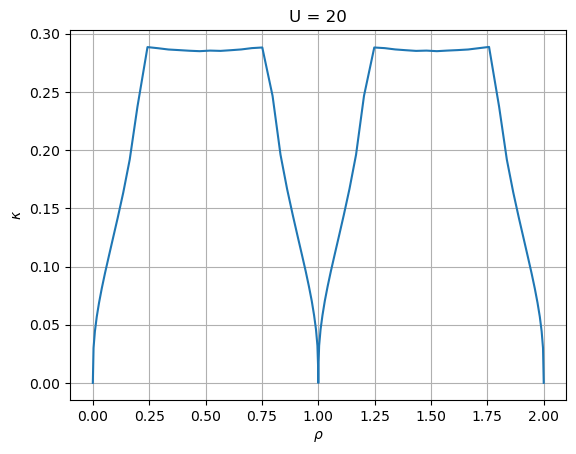

In [23]:
one_plot(rho_U20, kappa_U20, r'$\rho$', r'$\kappa$', r'U = 20')

## 3. Energy

### Setup

In [26]:
def J_1(x):
    if np.abs(x) < (2 * t):
        return - np.sqrt((2 * t)**2 - x**2) / np.pi
    else:
        return 0
    
def J_3(x):
    J_1_shifted = lambda k1, k2: J_1(x + (2 * t) * (np.cos(k1) + np.cos(k2)))

    integral_val = integrate.dblquad(J_1_shifted, -np.pi, np.pi, -np.pi, np.pi)

    return_val = d * integral_val[0] / ((2 * np.pi)**2)

    return return_val

def energy_3d(mu, U):
    if U >= 0:
        return J_3(mu) + J_3(mu - U) + U * I_3(mu - U)
    else: 
        return 2 * J_3(mu - U / 2) + U * I_3(mu - U / 2)
    
def create_energy_list(mu_list, U):
    energy_list = []

    i = 0 
    N = len(mu_list)

    for mu_val in mu_list:
        print(f'\rProgress: {(i / N * 100):.1f}%{' ' * 20}', end="", flush=True)
        i += 1
        
        e_val = energy_3d(mu_val, U)
        energy_list.append(e_val)

    return energy_list

### Calculation

In [27]:
energy_U20 = create_energy_list(mu_U20, 20)

Progress: 76.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

### Plots

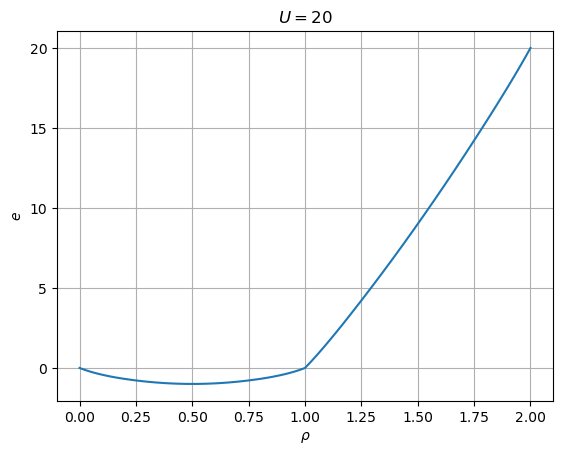

In [28]:
one_plot(rho_U20, energy_U20, r'$\rho$', r'$e$', r'$U = 20$')

### Save Progress

In [29]:
print('[')
for i in range(100):
    print(f'{energy_U20[i]},')
print(']')

[
0.0,
-0.01846613476157055,
-0.05177771340290666,
-0.09425581264196216,
-0.14372738394888177,
-0.19884385695231657,
-0.25862371473217366,
-0.32229079706946745,
-0.3892077047039554,
-0.4588600873297864,
-0.5308976309869717,
-0.6053147223738409,
-0.6833237777192275,
-0.7705143983323636,
-0.846690922463372,
-0.9076141481839984,
-0.9534220766506729,
-0.9842156430702693,
-1.0000613682159054,
-1.0009930962766096,
-0.9870128151368431,
-0.958090692867258,
-0.9141643414450494,
-0.8551372843297914,
-0.7808763283199858,
-0.6935870242081261,
-0.6148149431939718,
-0.5400633039513867,
-0.46773903362927527,
-0.3977737539843336,
-0.33048944489156923,
-0.2663837699543679,
-0.20607880845413926,
-0.15033094928415522,
-0.100089989272343,
-0.05664357278444827,
-0.022011146127138007,
-0.0008220418426473818,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0019292366183468138,
0.0541434142716726,
0.14624909713988582,
0.2716868078495000

In [ ]:
energy_U20_copy = [
0.0,
-0.01846613476157055,
-0.05177771340290666,
-0.09425581264196216,
-0.14372738394888177,
-0.19884385695231657,
-0.25862371473217366,
-0.32229079706946745,
-0.3892077047039554,
-0.4588600873297864,
-0.5308976309869717,
-0.6053147223738409,
-0.6833237777192275,
-0.7705143983323636,
-0.846690922463372,
-0.9076141481839984,
-0.9534220766506729,
-0.9842156430702693,
-1.0000613682159054,
-1.0009930962766096,
-0.9870128151368431,
-0.958090692867258,
-0.9141643414450494,
-0.8551372843297914,
-0.7808763283199858,
-0.6935870242081261,
-0.6148149431939718,
-0.5400633039513867,
-0.46773903362927527,
-0.3977737539843336,
-0.33048944489156923,
-0.2663837699543679,
-0.20607880845413926,
-0.15033094928415522,
-0.100089989272343,
-0.05664357278444827,
-0.022011146127138007,
-0.0008220418426473818,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0019292366183468138,
0.0541434142716726,
0.14624909713988582,
0.27168680784950006,
0.4297749668803971,
0.621756296718244,
0.8501380208517821,
1.1186278890406482,
1.432371327918025,
1.7985366188436407,
2.227589898417239,
2.736543049647178,
3.3622336279650833,
4.186095874450631,
5.042389138442127,
5.910873682770533,
6.792148872521594,
7.686814067265381,
8.595478323483887,
9.518768939045625,
10.457340739372137,
11.411886352909027,
12.383145813083857,
13.371920092648086,
14.379084968539084,
15.358559840437998,
16.121706599048437,
16.768171388966426,
17.332695357695098,
17.831126699176256,
18.272704852024123,
18.66326732735518,
19.00648172144444,
19.304346145089568,
19.55725746989662,
19.763576992920697,
19.91791399720012,
20.0,
]
